# Installing libraries needed for EDA

In [ ]:
# !pip install plotly-express
# !pip install pandasgui
#!pip install polars

In [123]:
import pandas as pd
import numpy as np
import plotly.express as px
import polars as pl
import matplotlib.pyplot as plt

# Creating DataFrame from data obtain from Kaggle

In [339]:
df = pd.read_csv('Population-by-state.csv')

In [380]:
df.shape

(53, 12)

In [734]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO.id             53 non-null     object
 1   GEO.id2            53 non-null     object
 2   GEO.display-label  53 non-null     object
 3   rescen42010        53 non-null     object
 4   resbase42010       53 non-null     object
 5   respop72010        53 non-null     object
 6   respop72011        53 non-null     object
 7   respop72012        53 non-null     object
 8   respop72013        53 non-null     object
 9   respop72014        53 non-null     object
 10  respop72015        53 non-null     object
 11  respop72016        53 non-null     object
dtypes: object(12)
memory usage: 5.1+ KB


In [735]:
df.describe()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
count,53,53,53,53,53,53,53,53,53,53,53,53
unique,53,53,53,53,53,53,53,53,53,53,53,53
top,0400000US47,41,South Dakota,8001024,9884129,2064756,5118360,2855782,2958663,12867544,Population Estimate (as of July 1) - 2015,12801539
freq,1,1,1,1,1,1,1,1,1,1,1,1


In [384]:
df.head(15)

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016
1,0400000US01,1,Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300
2,0400000US02,2,Alaska,710231,710249,714031,722713,731089,736879,736705,737709,741894
3,0400000US04,4,Arizona,6392017,6392301,6408312,6467163,6549634,6624617,6719993,6817565,6931071
4,0400000US05,5,Arkansas,2915918,2916025,2921995,2939493,2950685,2958663,2966912,2977853,2988248
5,0400000US06,6,California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017
6,0400000US08,8,Colorado,5029196,5029324,5048644,5118360,5189867,5267603,5349648,5448819,5540545
7,0400000US09,9,Connecticut,3574097,3574114,3579899,3589893,3593795,3596003,3591873,3584730,3576452
8,0400000US10,10,Delaware,897934,897936,899816,907924,916993,925395,934948,944076,952065
9,0400000US11,11,District of Columbia,601723,601766,605183,620477,635327,649165,659005,670377,681170


# Cleaning process

In [ ]:
"""Clean population dataset"""
pop_by_state = df.copy()
pop_by_state.columns = pop_by_state.iloc[0]
pop_by_state.drop(0,axis=0, inplace=True)
pop_by_state.drop(['Id', 'Id2','April 1, 2010 - Census', 'April 1, 2010 - Estimates Base'], axis=1, inplace=True)
pop_by_state.columns = ['State','pop10','pop11','pop12','pop13','pop14','pop15','pop16']

In [ ]:
pop_by_state.info()

In [ ]:
pop_by_state['State'] = pop_by_state['State'].astype(str).astype(str)
pop_by_state['pop10'] = pop_by_state['pop10'].astype(str).astype(int)
pop_by_state['pop11'] = pop_by_state['pop11'].astype(str).astype(int)
pop_by_state['pop12'] = pop_by_state['pop12'].astype(str).astype(int)
pop_by_state['pop13'] = pop_by_state['pop13'].astype(str).astype(int)
pop_by_state['pop14'] = pop_by_state['pop14'].astype(str).astype(int)
pop_by_state['pop15'] = pop_by_state['pop15'].astype(str).astype(int)
pop_by_state['pop16'] = pop_by_state['pop16'].astype(str).astype(int)

In [736]:
pop_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 52
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   pop10   52 non-null     int64 
 2   pop11   52 non-null     int64 
 3   pop12   52 non-null     int64 
 4   pop13   52 non-null     int64 
 5   pop14   52 non-null     int64 
 6   pop15   52 non-null     int64 
 7   pop16   52 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 5.7+ KB


In [737]:
pop_by_state.head()

,State,pop10,pop11,pop12,pop13,pop14,pop15,pop16
1,Alabama,4785492,4799918,4815960,4829479,4843214,4853875,4863300
2,Alaska,714031,722713,731089,736879,736705,737709,741894
3,Arizona,6408312,6467163,6549634,6624617,6719993,6817565,6931071
4,Arkansas,2921995,2939493,2950685,2958663,2966912,2977853,2988248
5,California,37332685,37676861,38011074,38335203,38680810,38993940,39250017


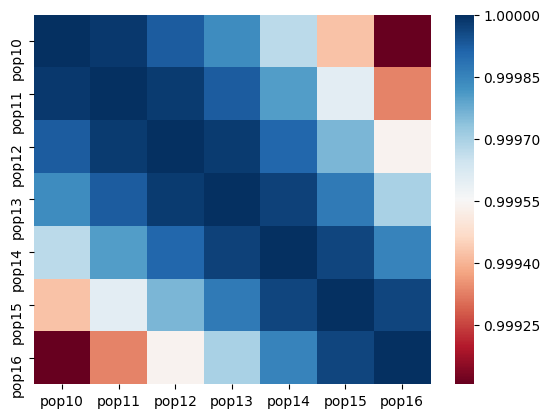

In [740]:
#Seeing if there are any correlation between poplutation
corr = pop_by_state.corr()
sns.heatmap(corr, cmap='RdBu')
plt.show()

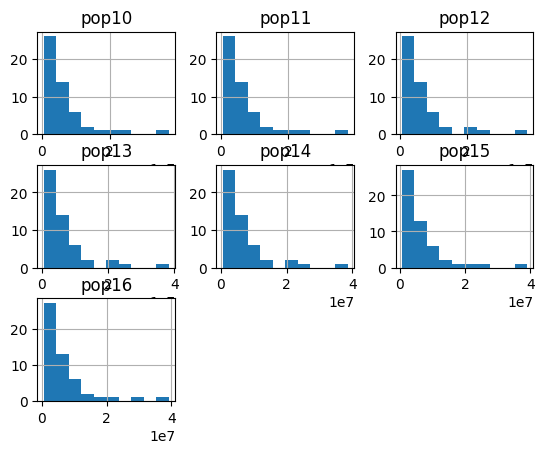

In [750]:

#define format for subplots (1 row and 3 columns)

#create histogram for each column in DataFrame
pop_by_state.hist()
plt.show()

# Instead of creating graph with count I am lookin gat percentage of population in reference to total population per year

In [759]:
pop_by_state_sum = pop_by_state[["pop10",'pop11','pop12','pop13','pop14','pop15','pop16']].sum() 
pop_by_state_sum

pop10    313069718
pop11    315342090
pop12    317632867
pop13    319797985
pop14    322098330
pop15    324369799
pop16    326538820
dtype: int64

# Percentage of population

In [760]:
pop_by_state_sum_percentage_measure = round((pop_by_state[["pop10",'pop11','pop12','pop13','pop14','pop15','pop16']] / pop_by_state_sum )* 100)

pop_by_state_sum_percentage_measure

,pop10,pop11,pop12,pop13,pop14,pop15,pop16
1,2.0,2.0,2.0,2.0,2.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,12.0,12.0,12.0,12.0,12.0,12.0,12.0
6,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,6.0,6.0,6.0,6.0,6.0,6.0,6.0


# Looks like high corr. but is it significant 

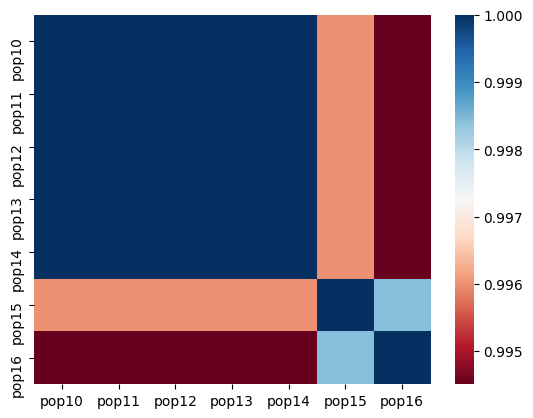

In [761]:
#pop_by_state_sum_percentage_measure.corr()
#g = sns.pairplot(homeless_pop)
corr = pop_by_state_sum_percentage_measure.corr()
sns.heatmap(corr, cmap='RdBu')
plt.show()

In [1007]:
pop_by_state['State']

1                  Alabama
2                   Alaska
3                  Arizona
4                 Arkansas
5               California
6                 Colorado
7              Connecticut
8                 Delaware
9     District of Columbia
10                 Florida
11                 Georgia
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21                Maryland
22           Massachusetts
23                Michigan
24               Minnesota
25             Mississippi
26                Missouri
27                 Montana
28                Nebraska
29                  Nevada
30           New Hampshire
31              New Jersey
32              New Mexico
33                New York
34          North Carolina
35            North Dakota
36                    Ohio
37                Oklahoma
3

In [1267]:
#type(pop_by_state_sum_percentage_measure)

In [1268]:
#pop_by_state_sum_percentage_measure

# Coverting series to a dataframe and adding the State column to the dataframe 

In [774]:
type(pop_by_state_sum_percentage_measure)

pandas.core.frame.DataFrame

In [1008]:
pop_by_state_sum_percentage_measure['State'] = pop_by_state_state['State']

In [1009]:
pop_by_state_state = (pop_by_state['State']).to_frame()

In [1010]:
type(pop_by_state_state)

pandas.core.frame.DataFrame

In [784]:
#pop_by_state_state['State']

In [1011]:
pop_by_state_sum_percentage_measure['State'] = pop_by_state_sum_percentage_measure['State'].astype('str')

In [1012]:
pop_by_state_sum_percentage_measure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 52
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pop10   52 non-null     float64
 1   pop11   52 non-null     float64
 2   pop12   52 non-null     float64
 3   pop13   52 non-null     float64
 4   pop14   52 non-null     float64
 5   pop15   52 non-null     float64
 6   pop16   52 non-null     float64
 7   State   52 non-null     object 
dtypes: float64(7), object(1)
memory usage: 5.7+ KB


In [1013]:
#pop_by_state_sum_percentage_measure

,pop10,pop11,pop12,pop13,pop14,pop15,pop16,State
1,2.0,2.0,2.0,2.0,2.0,1.0,1.0,Alabama
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alaska
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Arizona
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Arkansas
5,12.0,12.0,12.0,12.0,12.0,12.0,12.0,California
6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Colorado
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Connecticut
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Delaware
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,District of Columbia
10,6.0,6.0,6.0,6.0,6.0,6.0,6.0,Florida


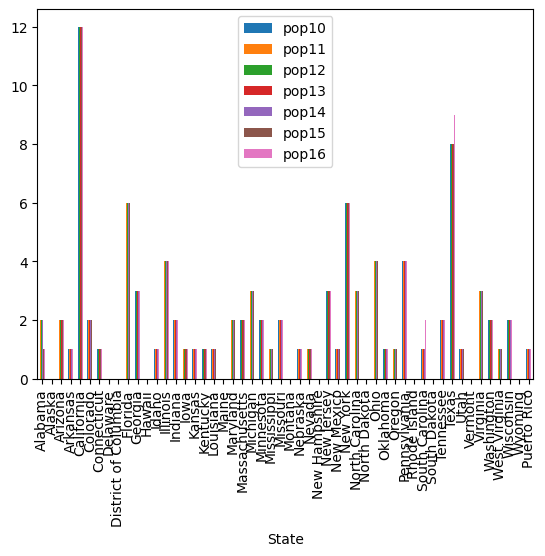

<Figure size 2500x2000 with 0 Axes>

In [1076]:
#plt.figure(figsize=(25, 20))
pop_by_state_sum_percentage_measure.plot.bar(x='State', y=['pop10','pop11','pop12','pop13','pop14','pop15','pop16'], rot=90)
#df.plot(x="Name", y=["Price", "User Rating"], kind="bar", figsize=(9, 8))
plt.figure(figsize=(25, 20))
plt.show()

# Installing more libraries 

In [1064]:
import numpy as np 
import pandas as pd 
import plotly.express as px

In [1107]:
!pip3 install scikit-learn --upgrade --user
!pip3 install numpy 
!pip install --upgrade pip
!pip install scikit-learn

Requirement already up-to-date: scikit-learn in ./Library/Python/3.8/lib/python/site-packages (1.2.2)
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1015]:
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
fig = px.choropleth_mapbox(pop_by_state_sum_percentage_measure,  locations=pop_by_state_sum_percentage_measure['pop10'], color='pop10',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'pop10':'pop11'}
                          )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
plt.show()

In [1255]:
#pop_by_state_sum_percentage_measure['State'].astype(str)
#pop_by_state_sum_percentage_measure['State'] = pop_by_state_sum_percentage_measure['State'].str.decode('utf-8')
#pop_by_state_sum_percentage_measure['State'].str.encode().decode()
#pop_by_state_sum_percentage_measure['State'].apply(lambda x: x.decode('utf-8')) 

In [ ]:
#pop_by_state_sum_percentage_measure

In [1256]:
# import plotly.graph_objects as go

# import plotly.express as px

# fig = go.Figure(pop_by_state_sum_percentage_measure=go.Scattergeo(
#         lon = pop_by_state_sum_percentage_measure['pop10'],
#         lat = pop_by_state_sum_percentage_measure['pop11'],
#         text = pop_by_state_sum_percentage_measure['pop12'],
#         mode = 'markers',
#         marker_color = pop_by_state_sum_percentage_measure['pop10'],
#         ))
# fig.update_layout(
#         title = 'Most trafficked US airports<br>(Hover for airport names)',
#         geo_scope='usa',
#     )
# fig.show()

# Data for the Homeless  obtained from Kaggle

In [340]:
df1 = pd.read_csv('2007-2016-Homelessnewss-USA.csv')

In [378]:
df1.shape

(86529, 6)

In [788]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        86529 non-null  object
 1   State       86529 non-null  object
 2   CoC Number  86529 non-null  object
 3   CoC Name    86529 non-null  object
 4   Measures    86529 non-null  object
 5   Count       86529 non-null  object
dtypes: object(6)
memory usage: 4.0+ MB


In [789]:
df1.describe()

,Year,State,CoC Number,CoC Name,Measures,Count
count,86529,86529,86529,86529,86529,86529
unique,10,54,414,414,42,3608
top,1/1/2015,CA,KY-501,Southeastern Oklahoma Regional CoC,Chronically Homeless Individuals,0
freq,16926,8946,216,216,3999,12209


In [383]:
df1.tail(15)

,Year,State,CoC Number,CoC Name,Measures,Count
86514,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Total Homeless,857
86515,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Children of Parenting Youth,3
86516,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Chronically Homeless,58
86517,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Chronically Homeless Individuals,51
86518,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Chronically Homeless People in Fam...,7
86519,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless,366
86520,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Individuals,240
86521,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless People in Families,126
86522,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Children (U...,2
86523,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Young Adult...,5


# Cleaning Process

In [724]:
# print(df1['Measures'].value_counts())
# plt.figure(figsize=(22,10))
# sns.scatterplot(df1['Measures'])
# plt.xticks(rotation=90)
# plt.show()

In [798]:
df1['Count'] = df1['Count'].str.replace(',', '').astype(np.int64)

In [799]:
df1['Measures'] = df1['Measures'].str.replace(',', '').astype(str)

In [801]:

"""Clean homelss dataset"""
homeless_pop = df1.copy()
#homeless_pop['Count'] = homeless_pop['Count'].str.replace(',', '').astype(np.int64) #turn count number into int
homeless_pop.drop(['CoC Number','CoC Name'], axis=1, inplace=True)
homeless_pop['Year'] = pd.to_datetime(homeless_pop['Year'])
homeless_pop['Year'] = homeless_pop['Year'].dt.year
homeless_pop.head()

,Year,State,Measures,Count
0,2007,AK,Chronically Homeless Individuals,224
1,2007,AK,Homeless Individuals,696
2,2007,AK,Homeless People in Families,278
3,2007,AK,Sheltered Chronically Homeless Individuals,187
4,2007,AK,Sheltered Homeless,842


In [387]:
homeless_pop.tail(15)

,Year,State,Measures,Count
86514,2016,WY,Total Homeless,857
86515,2016,WY,Unsheltered Children of Parenting Youth,3
86516,2016,WY,Unsheltered Chronically Homeless,58
86517,2016,WY,Unsheltered Chronically Homeless Individuals,51
86518,2016,WY,Unsheltered Chronically Homeless People in Fam...,7
86519,2016,WY,Unsheltered Homeless,366
86520,2016,WY,Unsheltered Homeless Individuals,240
86521,2016,WY,Unsheltered Homeless People in Families,126
86522,2016,WY,Unsheltered Homeless Unaccompanied Children (U...,2
86523,2016,WY,Unsheltered Homeless Unaccompanied Young Adult...,5


In [802]:
homeless_pop.nunique()

Year          10
State         54
Measures      42
Count       3608
dtype: int64

In [803]:
homeless_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      86529 non-null  int64 
 1   State     86529 non-null  object
 2   Measures  86529 non-null  object
 3   Count     86529 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


In [804]:
#homeless_pop['Year'] = homeless_pop['Year'].dt.strftime('%Y')
homeless_pop['Year'] = pd.to_datetime(homeless_pop['Year'], format='%Y')

In [805]:
homeless_pop['Measures'] = homeless_pop['Measures'].str.replace(',', '').astype(str)

In [809]:
homeless_pop['Measures'] = homeless_pop['Measures'].astype(str)

In [810]:
homeless_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      86529 non-null  datetime64[ns]
 1   State     86529 non-null  object        
 2   Measures  86529 non-null  object        
 3   Count     86529 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.6+ MB


In [812]:
homeless_pop.head()

,Year,State,Measures,Count
0,2007-01-01,AK,Chronically Homeless Individuals,224
1,2007-01-01,AK,Homeless Individuals,696
2,2007-01-01,AK,Homeless People in Families,278
3,2007-01-01,AK,Sheltered Chronically Homeless Individuals,187
4,2007-01-01,AK,Sheltered Homeless,842


# Getting total count of homelessness per State

In [813]:
homeless_pop_measures_sum = homeless_pop.loc[homeless_pop['Measures'] != 'Total Homeless']
homeless_pop_measures_sum

,Year,State,Measures,Count
0,2007-01-01,AK,Chronically Homeless Individuals,224
1,2007-01-01,AK,Homeless Individuals,696
2,2007-01-01,AK,Homeless People in Families,278
3,2007-01-01,AK,Sheltered Chronically Homeless Individuals,187
4,2007-01-01,AK,Sheltered Homeless,842
...,...,...,...,...
86524,2016-01-01,WY,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,2016-01-01,WY,Unsheltered Homeless Veterans,31
86526,2016-01-01,WY,Unsheltered Parenting Youth (Under 25),3
86527,2016-01-01,WY,Unsheltered Parenting Youth Age 18-24,3


In [825]:
homeless_pop_measures_sum = homeless_pop_measures_sum.groupby(["Measures"]).sum() 
homeless_pop_measures_sum

,Count
Measures,
Children of Parenting Youth,26560
Chronically Homeless,615437
Chronically Homeless Individuals,983926
Chronically Homeless People in Families,84713
Homeless Individuals,3816262
Homeless People in Families,2264875
Homeless Unaccompanied Children (Under 18),8491
Homeless Unaccompanied Young Adults (Age 18-24),64102
Homeless Unaccompanied Youth (Under 25),72593


In [817]:
Total_homeless_pop_measures_sum  = homeless_pop_measures_sum['Count'].sum()
Total_homeless_pop_measures_sum

22671303

In [819]:
Total_percentage_measure = round((homeless_pop_measures_sum['Count'] / Total_homeless_pop_measures_sum )* 100)
Total_percentage_measure

Measures
Children of Parenting Youth                                     0.0
Chronically Homeless                                            3.0
Chronically Homeless Individuals                                4.0
Chronically Homeless People in Families                         0.0
Homeless Individuals                                           17.0
Homeless People in Families                                    10.0
Homeless Unaccompanied Children (Under 18)                      0.0
Homeless Unaccompanied Young Adults (Age 18-24)                 0.0
Homeless Unaccompanied Youth (Under 25)                         0.0
Homeless Veterans                                               1.0
Parenting Youth (Under 25)                                      0.0
Parenting Youth Age 18-24                                       0.0
Parenting Youth Under 18                                        0.0
Sheltered Children of Parenting Youth                           0.0
Sheltered Chronically Homeless         

# Top 15 Homelesness percentage

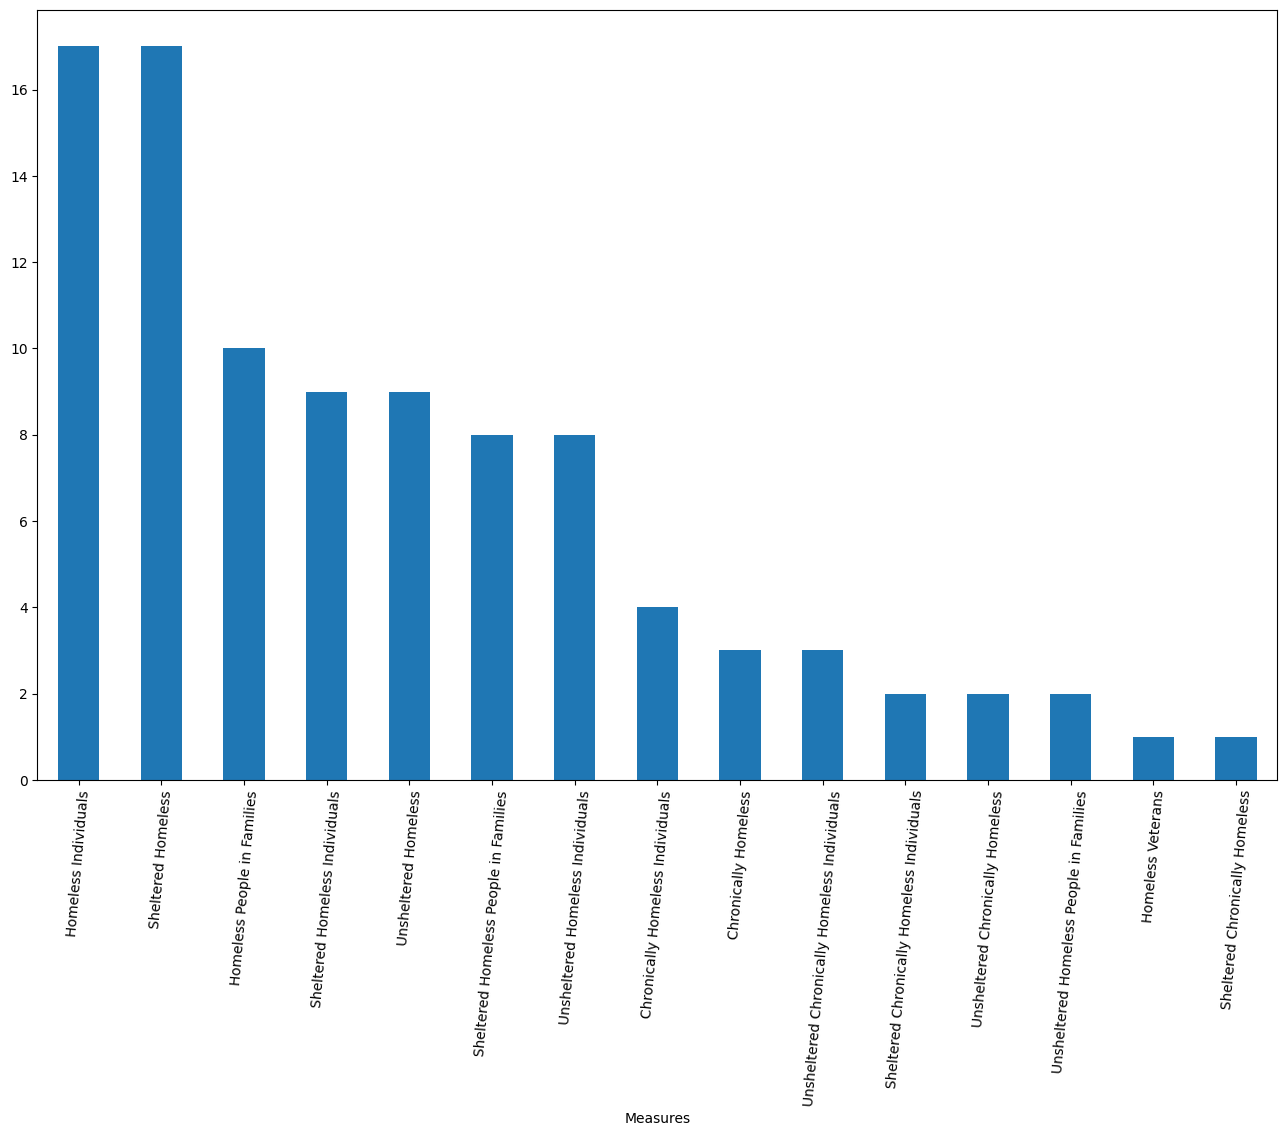

In [820]:
Total_percentage_measure = round((homeless_pop_measures_sum['Count'] / Total_homeless_pop_measures_sum )* 100)

top_ten_measure =Total_percentage_measure.nlargest(15)
plt.figure(figsize=(16, 10))
top_ten_measure.plot.bar(x='Measures', y='Count', rot=85)
plt.show()

# Bottom percentage of Homelessness

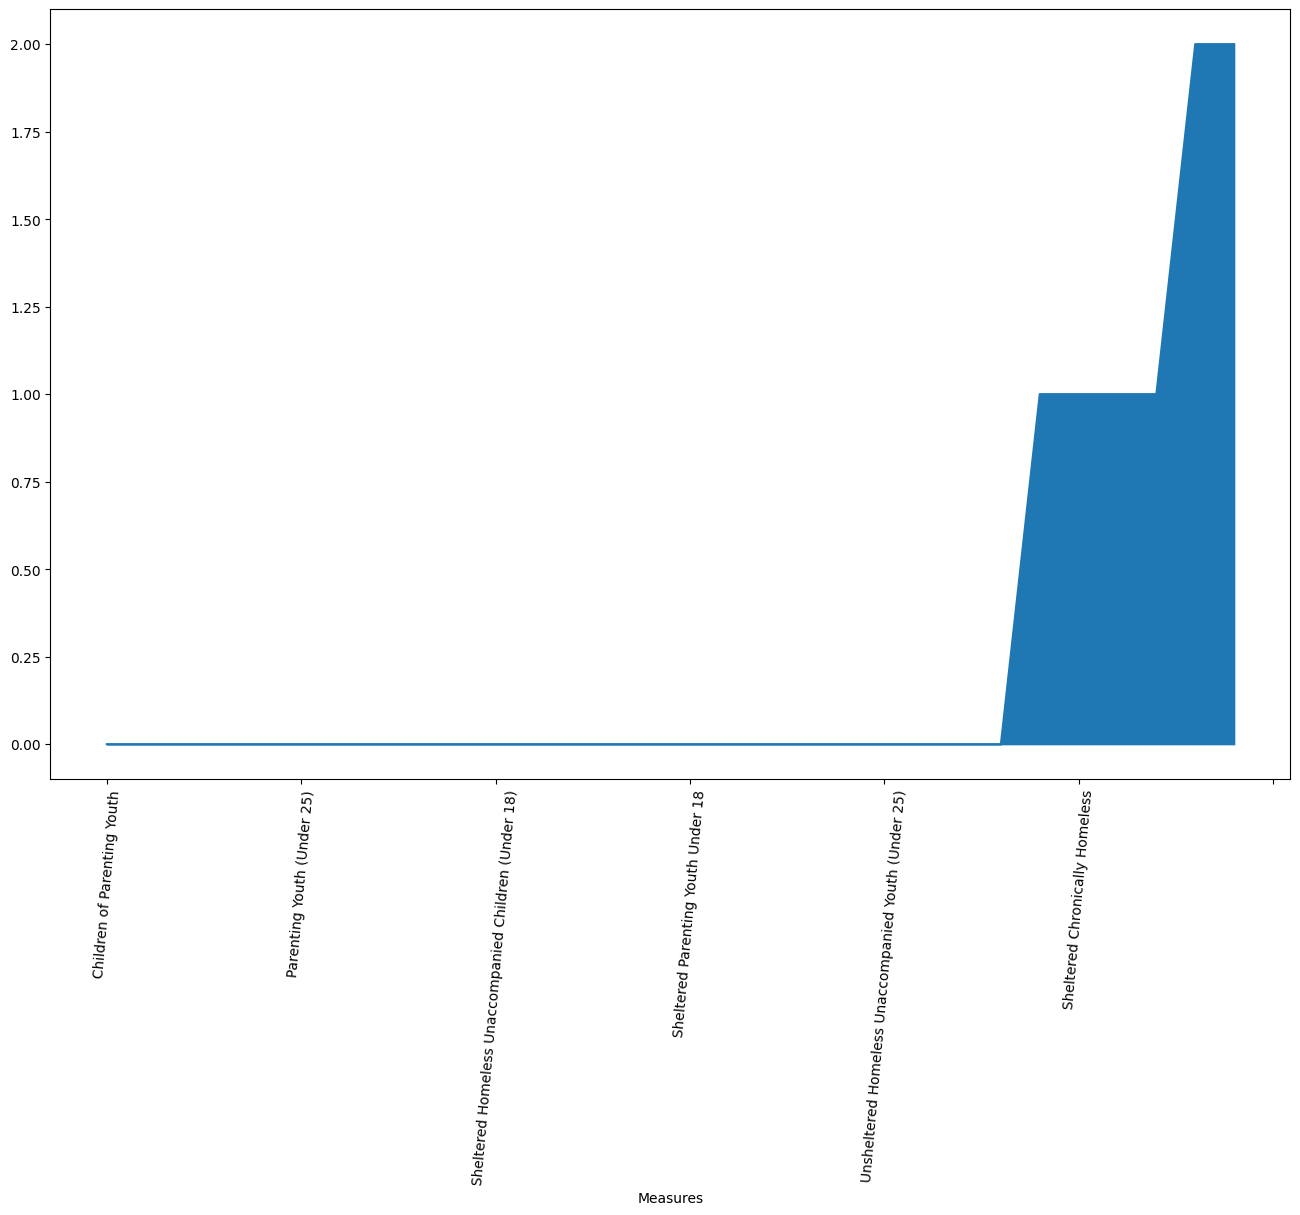

In [880]:
Total_percentage_measure = round((homeless_pop_measures_sum['Count'] / Total_homeless_pop_measures_sum )* 100)

top_ten_measure =Total_percentage_measure.nsmallest(30)
plt.figure(figsize=(16, 10))
top_ten_measure.plot.area(x='Measures', y='Count', rot=85)
plt.show()

# Plot Year and State count to obtain any insight 

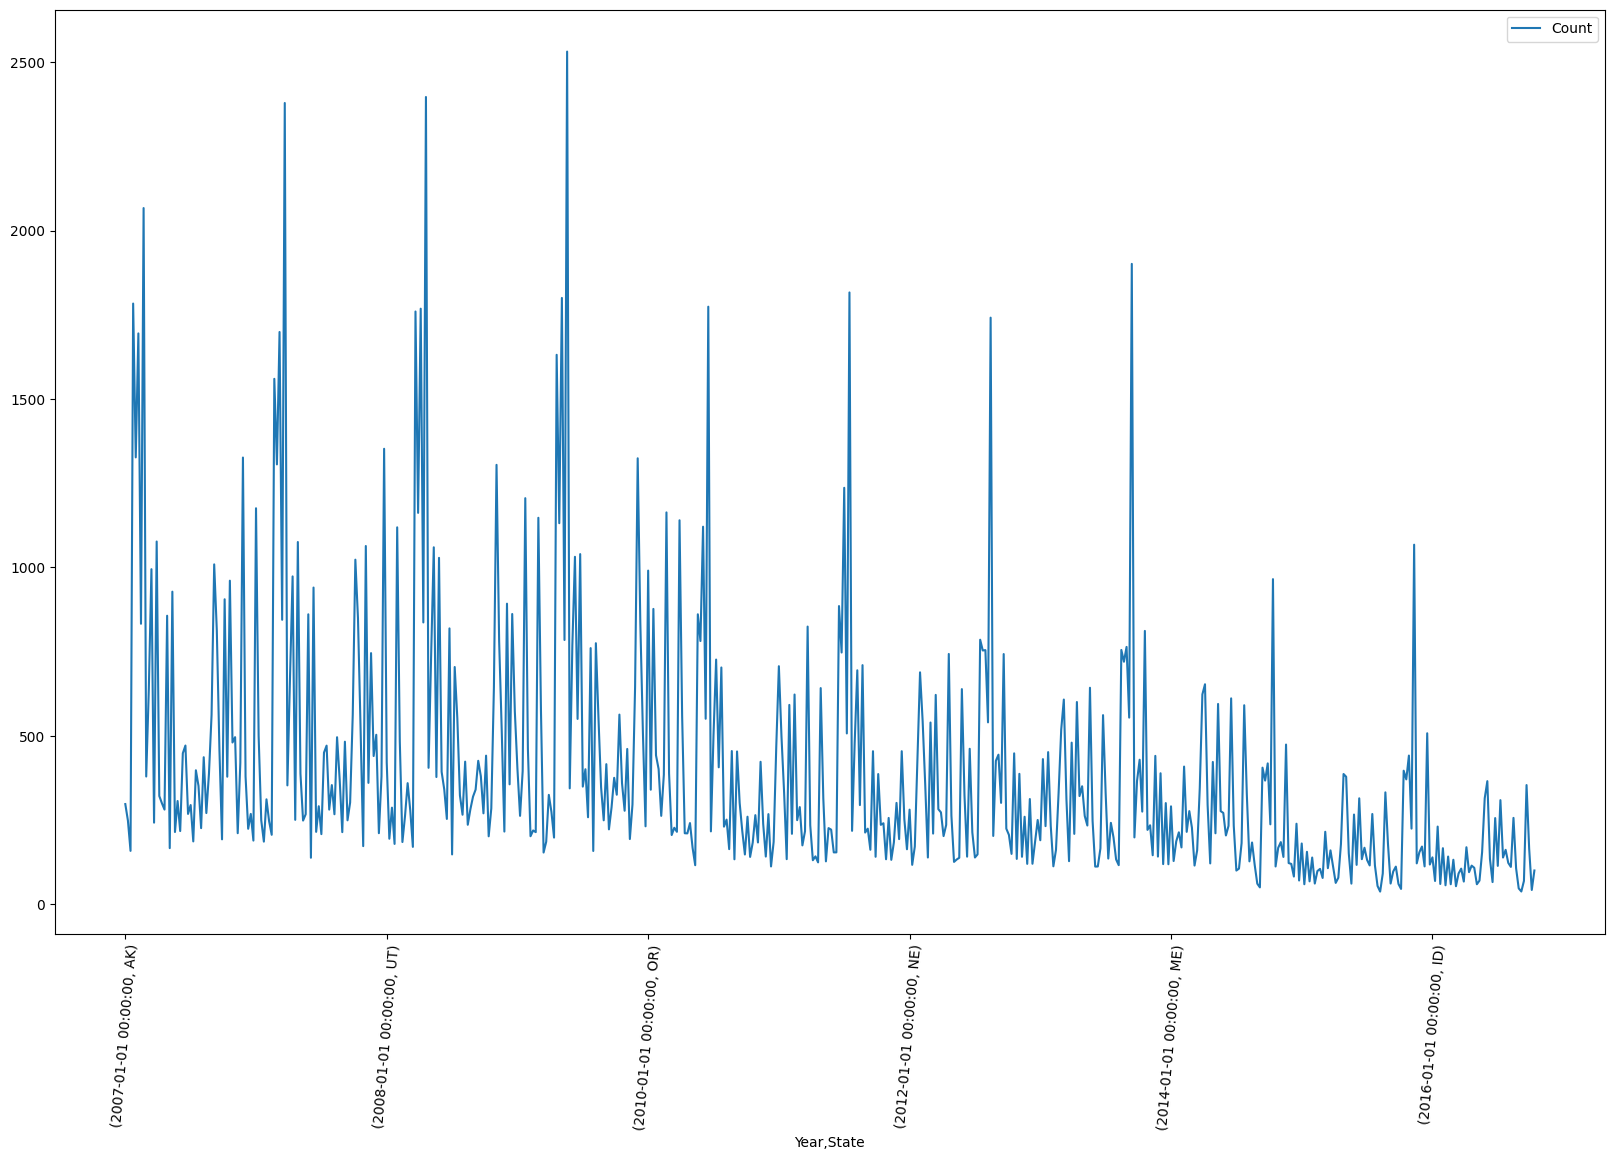

In [866]:
homeless_pop.groupby(['Year','State']).mean().plot( figsize=(20,12), legend=True, rot=85)
#plt.figure(figsize=(20,12))
plt.show() 

# Obtaining Homelessness and State percentage 

In [883]:
Total_homelessness_acros_the_nation = homeless_pop_measures_by_state['Count'].sum()
Total_homelessness_acros_the_nation

6081137

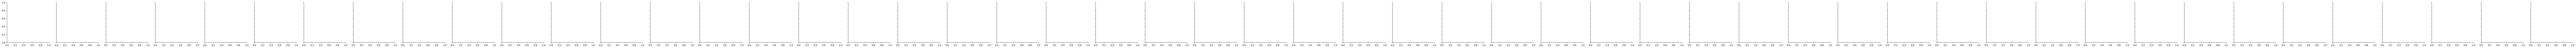

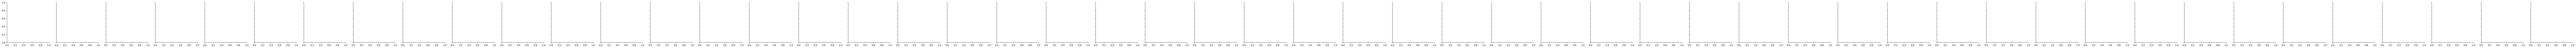

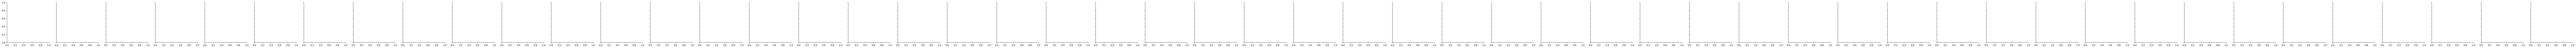

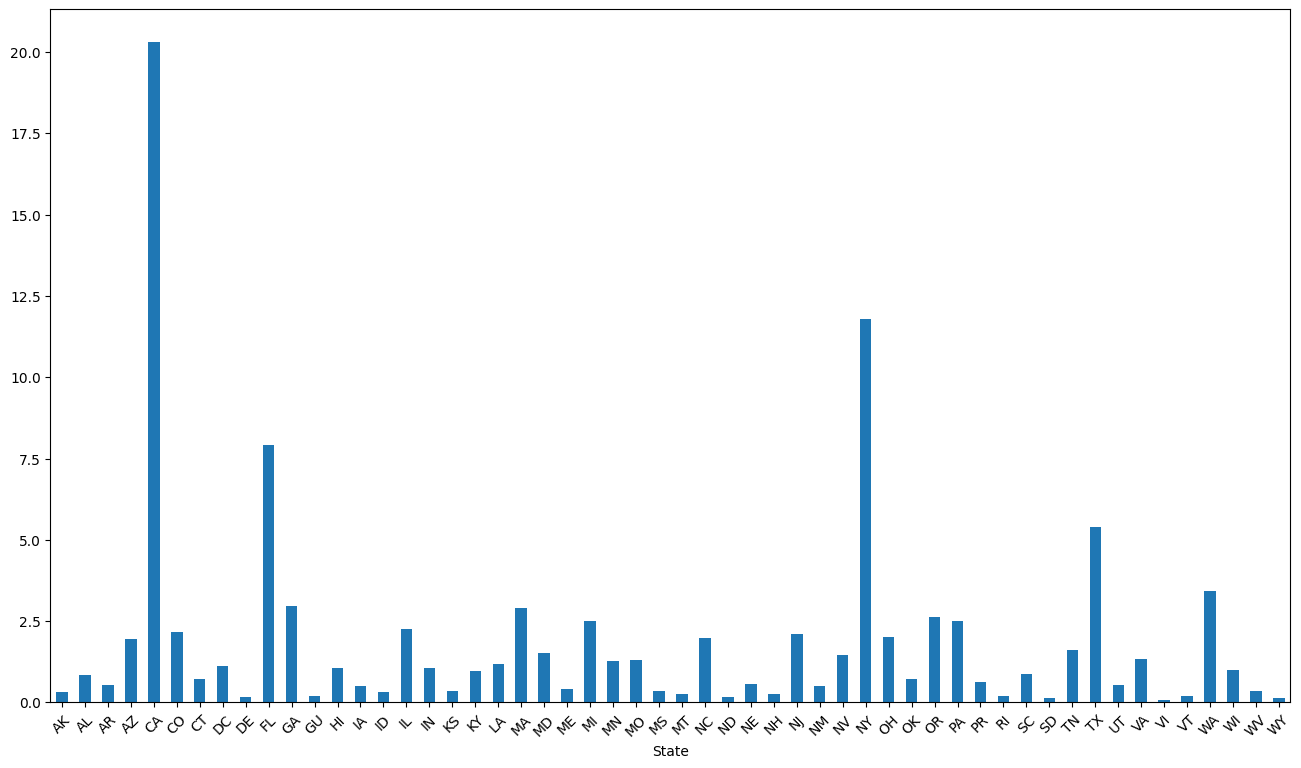

In [1118]:

Total_percentage = round((homeless_pop_measures_by_state['Count'] / homeless_pop_measures_by_state['Count'].sum() )* 100, 3)
Total_percentage
plt.figure(figsize=(16, 9))
Total_percentage.plot.bar(x='State', y='Count', rot=45)
plt.show()

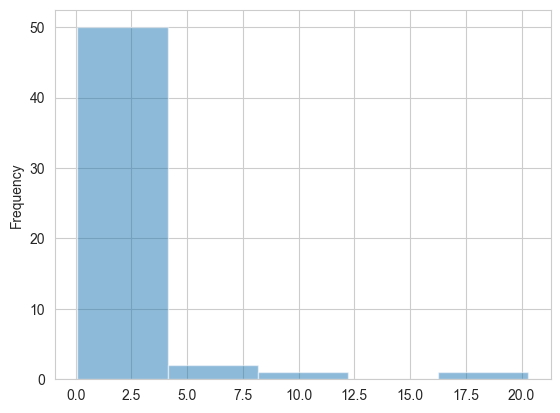

In [1270]:
Total_percentage.plot.hist(bins=5, alpha=0.5)
plt.show()

In [1257]:
# import seaborn as sns
# #sns.heatmap(df1.corr())
# #homeless_pop.corr()
# #sns.heatmap(homeless_pop.corr());

# plt.figure(figsize=(16, 6))

# heatmap = sns.heatmap(homeless_pop.corr(), vmin=-1, vmax=1, annot=True)
# heatmap.set_title('homeless_pop', fontdict={'fontsize':12}, pad=12);
# plt.show()

To end on a good note: Homeless veterans number has decreased by tens of thousands


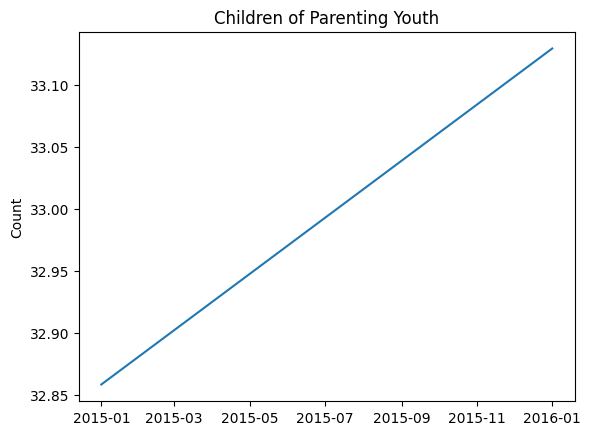

In [886]:


print ('To end on a good note:  number has decreased by tens of thousands')
vets = homeless_pop.copy()
vets = vets[vets['Measures']=="Children of Parenting Youth"]
homeless_vets = vets.groupby('Year')[['Count']].mean()
homeless_vets.reset_index(inplace=True)
plt.plot(homeless_vets['Year'], homeless_vets['Count'])
plt.title("Children of Parenting Youth")
plt.ylabel('Count')
plt.show()

To end on a good note: Homeless veterans number has decreased by tens of thousands


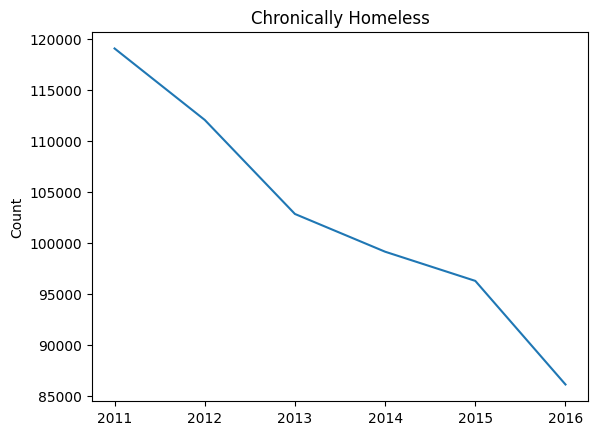

In [382]:

vets = homeless_pop.copy()
vets = vets[vets['Measures']=="Chronically Homeless"]
homeless_vets = vets.groupby('Year')[['Count']].sum()
homeless_vets.reset_index(inplace=True)
plt.plot(homeless_vets['Year'], homeless_vets['Count'])
plt.title("Chronically Homeless")
plt.ylabel('Count')
plt.show()

# Mergeing State and Homelessness Percentage Data

In [1136]:
Percentage_per_State = Total_percentage.to_frame().reset_index()

In [1140]:
Percentage_per_State

,State,Count
0,AK,0.309
1,AL,0.840
2,AR,0.528
3,AZ,1.941
4,CA,20.297
5,CO,2.169
6,CT,0.716
7,DC,1.116
8,DE,0.165
9,FL,7.928


In [1144]:
Percentage_Per_State = Percentage_per_State.rename(columns={"Count": "Percentage"})

In [1150]:
Percentage_Per_State[['State','Percentage']]

,State,Percentage
0,AK,0.309
1,AL,0.840
2,AR,0.528
3,AZ,1.941
4,CA,20.297
5,CO,2.169
6,CT,0.716
7,DC,1.116
8,DE,0.165
9,FL,7.928


In [1165]:
pop_by_state_sum_percentage_measure

,pop10,pop11,pop12,pop13,pop14,pop15,pop16,State,Percentage
1,2.0,2.0,2.0,2.0,2.0,1.0,1.0,AL,0.840
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AR,0.528
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AZ,1.941
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,CA,20.297
5,12.0,12.0,12.0,12.0,12.0,12.0,12.0,CO,2.169
6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,CT,0.716
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,DC,1.116
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DE,0.165
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FL,7.928
10,6.0,6.0,6.0,6.0,6.0,6.0,6.0,GA,2.970


In [1153]:

pop_by_state_sum_percentage_measure[['State','Percentage']] = Percentage_Per_State[['State','Percentage']]

In [1164]:
pop_by_state_sum_percentage_measure.rename(columns={'pop10':'2010','pop11':'2011', 'pop12':'2012', 'pop13':'2013', 'pop14':'2014', 'pop15':'2015' , 'pop16':'2016'})

,2010,2011,2012,2013,2014,2015,2016,State,Percentage
1,2.0,2.0,2.0,2.0,2.0,1.0,1.0,AL,0.840
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AR,0.528
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AZ,1.941
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,CA,20.297
5,12.0,12.0,12.0,12.0,12.0,12.0,12.0,CO,2.169
6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,CT,0.716
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,DC,1.116
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DE,0.165
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FL,7.928
10,6.0,6.0,6.0,6.0,6.0,6.0,6.0,GA,2.970


In [1149]:
result

,State,Percentage,pop10,pop11,pop12,pop13,pop14,pop15,pop16
0,AK,0.309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,0.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AR,0.528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AZ,1.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA,20.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
48,Washington,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0
49,West Virginia,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50,Wisconsin,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0
51,Wyoming,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#  #Going up over time
# Children of Parenting Youth
# Parenting Youth Age 18-24
# Unsheltered Children of Parenting Youth

In [ ]:
#Going down over time
# down -Chronically Homeless
# Chronically Homeless Individuals
# Chronically Homeless People in Families
# Chronically Homeless
# Homeless Individuals
# Homeless People in Families
# Homeless Unaccompanied Children (Under 18)
# Homeless Unaccompanied Young Adults (Age 18-24)
# Homeless Unaccompanied Youth (Under 25)
# Homeless Veterans
# Parenting Youth (Under 25)
# Parenting Youth Under 18
# Sheltered Children of Parenting Youth
# Sheltered Chronically Homeless
# Sheltered Chronically Homeless Individuals
# Sheltered Chronically Homeless People in Families
# Sheltered Homeless
# Sheltered Homeless Individuals
# Sheltered Homeless People in Families
# Sheltered Homeless Unaccompanied Children (Under 18)
# Sheltered Homeless Unaccompanied Young Adults (Age 18-24)
# Sheltered Homeless Unaccompanied Youth (Under 25)
# Sheltered Parenting Youth Age 18-24
# Sheltered Parenting Youth Under 18
# Total Homeless
# Unsheltered Chronically Homeless
# Unsheltered Chronically Homeless Individuals

In [201]:
#grouped_single.head()

Count
                                                max
State Measures                                     
AK    Children of Parenting Youth                16
      Chronically Homeless                      165
      Chronically Homeless Individuals          300
      Chronically Homeless People in Families    21
      Homeless Individuals                      905

In [209]:
#grouped_single= grouped_single[grouped_single['State'] =='AK']
#grouped_single = grouped_single.groupby(['Year','Count'])[['Measures']].sum()

In [210]:
#grouped_single

,Year,State,Measures,Count
,,,,max
0,2007,AK,Chronically Homeless Individuals,224
1,2007,AK,Homeless Individuals,696
2,2007,AK,Homeless People in Families,302
3,2007,AK,Sheltered Chronically Homeless Individuals,187
4,2007,AK,Sheltered Homeless,842
...,...,...,...,...
9433,2016,AK,Unsheltered Homeless Unaccompanied Youth (Unde...,26
9434,2016,AK,Unsheltered Homeless Veterans,29
9435,2016,AK,Unsheltered Parenting Youth (Under 25),0


In [295]:
# """Homeless Veterans"""

# print ('To end on a good note: Homeless veterans number has decreased by tens of thousands')
# vets = homeless_pop.copy()
# homeless_vets= homeless_vets[homeless_vets['State'] =='AK']
# homeless_vets = homeless_vets.groupby(['Year','Count'])[['Measures']].sum()
# #homeless_vets = vets.groupby([vets.Year,vets.Count])['Measures'].sum()
# homeless_vets.reset_index(inplace=True)
# plt.plot(homeless_vets['Measures'], homeless_vets['Count'])
# plt.title("Homeless Veterans in all 50 US states + Puerto Rico")
# plt.ylabel('Count')
# plt.show()

In [296]:
# homeless_vets = vets.groupby([vets.Year,vets.Count])['Measures'].sum()
# homeless_vets.reset_index(inplace=True)

In [159]:
# vets.groupby('Year')[['Count']].sum()

,Count
Year,
2007,78045
2008,74697
2009,61620
2010,62733
2011,64551
2012,63621
2013,56871
2014,52786
2015,54815


In [302]:
#df_measures = homeless_pop.groupby('Measures').sum()

In [348]:
df1.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,1/1/2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842


# Looking for corr. between population and homelessness percentage data

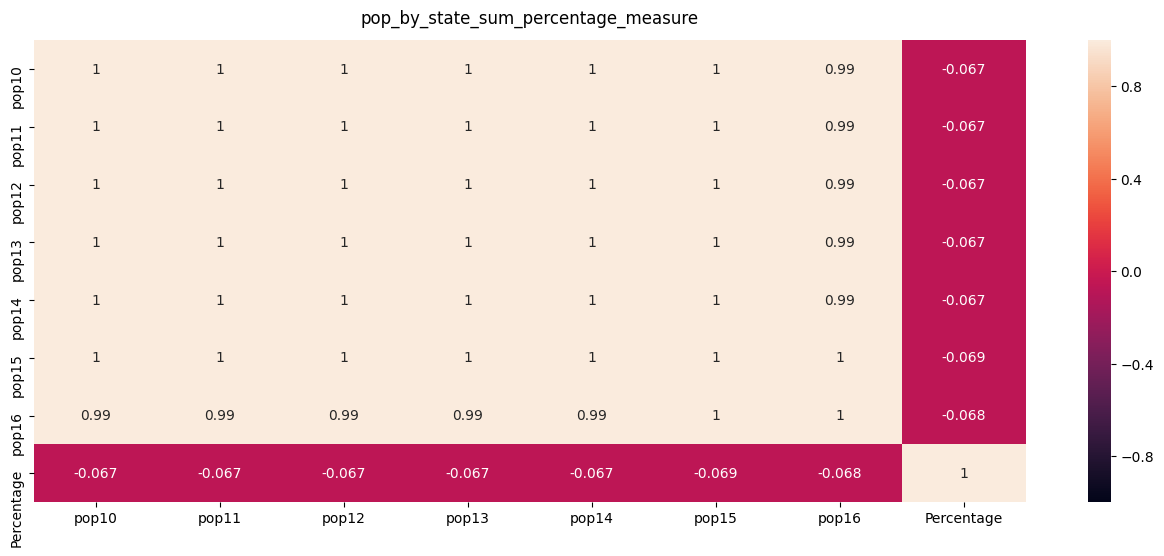

In [1166]:
import seaborn as sns
#sns.heatmap(df1.corr())
#homeless_pop.corr()
#sns.heatmap(homeless_pop.corr());

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(pop_by_state_sum_percentage_measure.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('pop_by_state_sum_percentage_measure', fontdict={'fontsize':12}, pad=12);
plt.show()

In [1258]:
#homeless_pop_measures_sum

In [1167]:
pop_by_state_sum_percentage_measure

,pop10,pop11,pop12,pop13,pop14,pop15,pop16,State,Percentage
1,2.0,2.0,2.0,2.0,2.0,1.0,1.0,AL,0.840
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AR,0.528
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AZ,1.941
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,CA,20.297
5,12.0,12.0,12.0,12.0,12.0,12.0,12.0,CO,2.169
6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,CT,0.716
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,DC,1.116
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DE,0.165
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FL,7.928
10,6.0,6.0,6.0,6.0,6.0,6.0,6.0,GA,2.970


# Percentage of Homelessness and State

In [1181]:

fig = px.bar(pop_by_state_sum_percentage_measure, y=pop_by_state_sum_percentage_measure['Percentage'], x='State', text='State')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [1189]:
x = ['pop10','pop11', 'pop12', 'pop13', 'pop14', 'pop15' , 'pop16']
y = pop_by_state_sum_percentage_measure['Percentage']
# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['State'])])
fig.update_layout(title_text='Homelessness_Per_Population_percentage')
fig.show()

In [1190]:
x = ['pop10','pop11', 'pop12', 'pop13', 'pop14', 'pop15' , 'pop16']
fig = px.scatter(pop_by_state_sum_percentage_measure, x=x, y="Percentage",    size="Percentage", color="State",
                 hover_name="State", log_x=True, size_max=60)
fig.show()

In [1172]:
fig = px.bar(pop_by_state_sum_percentage_measure, x='pop15', y='Percentage',barmode='stack',color='State')
fig.show()

In [1282]:
import plotly.express as px
from plotly.subplots import make_subplots



fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Scatter(x=pop_by_state_sum_percentage_measure['pop10'], y=pop_by_state_sum_percentage_measure['Percentage'], mode="markers",name="Population 2010"),
    row=1, col=3
)

fig.add_trace(
    go.Scatter(x=pop_by_state_sum_percentage_measure['pop11'], y=pop_by_state_sum_percentage_measure['Percentage'], mode="markers",name="Population 2011"),
    row=1, col=3
)

fig.add_trace(
    go.Scatter(x=pop_by_state_sum_percentage_measure['pop12'], y=pop_by_state_sum_percentage_measure['Percentage'], mode="markers", name="Population 2012",),
    row=1, col=3
)
fig.add_trace(
    go.Scatter(x=pop_by_state_sum_percentage_measure['pop13'], y=pop_by_state_sum_percentage_measure['Percentage'], mode="markers", name="Population 2013",),
    row=1, col=3
)
fig.add_trace(
    go.Scatter(x=pop_by_state_sum_percentage_measure['pop14'], y=pop_by_state_sum_percentage_measure['Percentage'], mode="markers", name="Population 2014",),
    row=1, col=3
)
fig.add_trace(
    go.Scatter(x=pop_by_state_sum_percentage_measure['pop15'], y=pop_by_state_sum_percentage_measure['Percentage'], mode="markers", name="Population 2015",),
    row=1, col=3
)
fig.add_trace(
    go.Scatter(x=pop_by_state_sum_percentage_measure['pop16'], y=pop_by_state_sum_percentage_measure['Percentage'], mode="markers", name="Population 2016",),
    row=1, col=3
)

fig.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encount

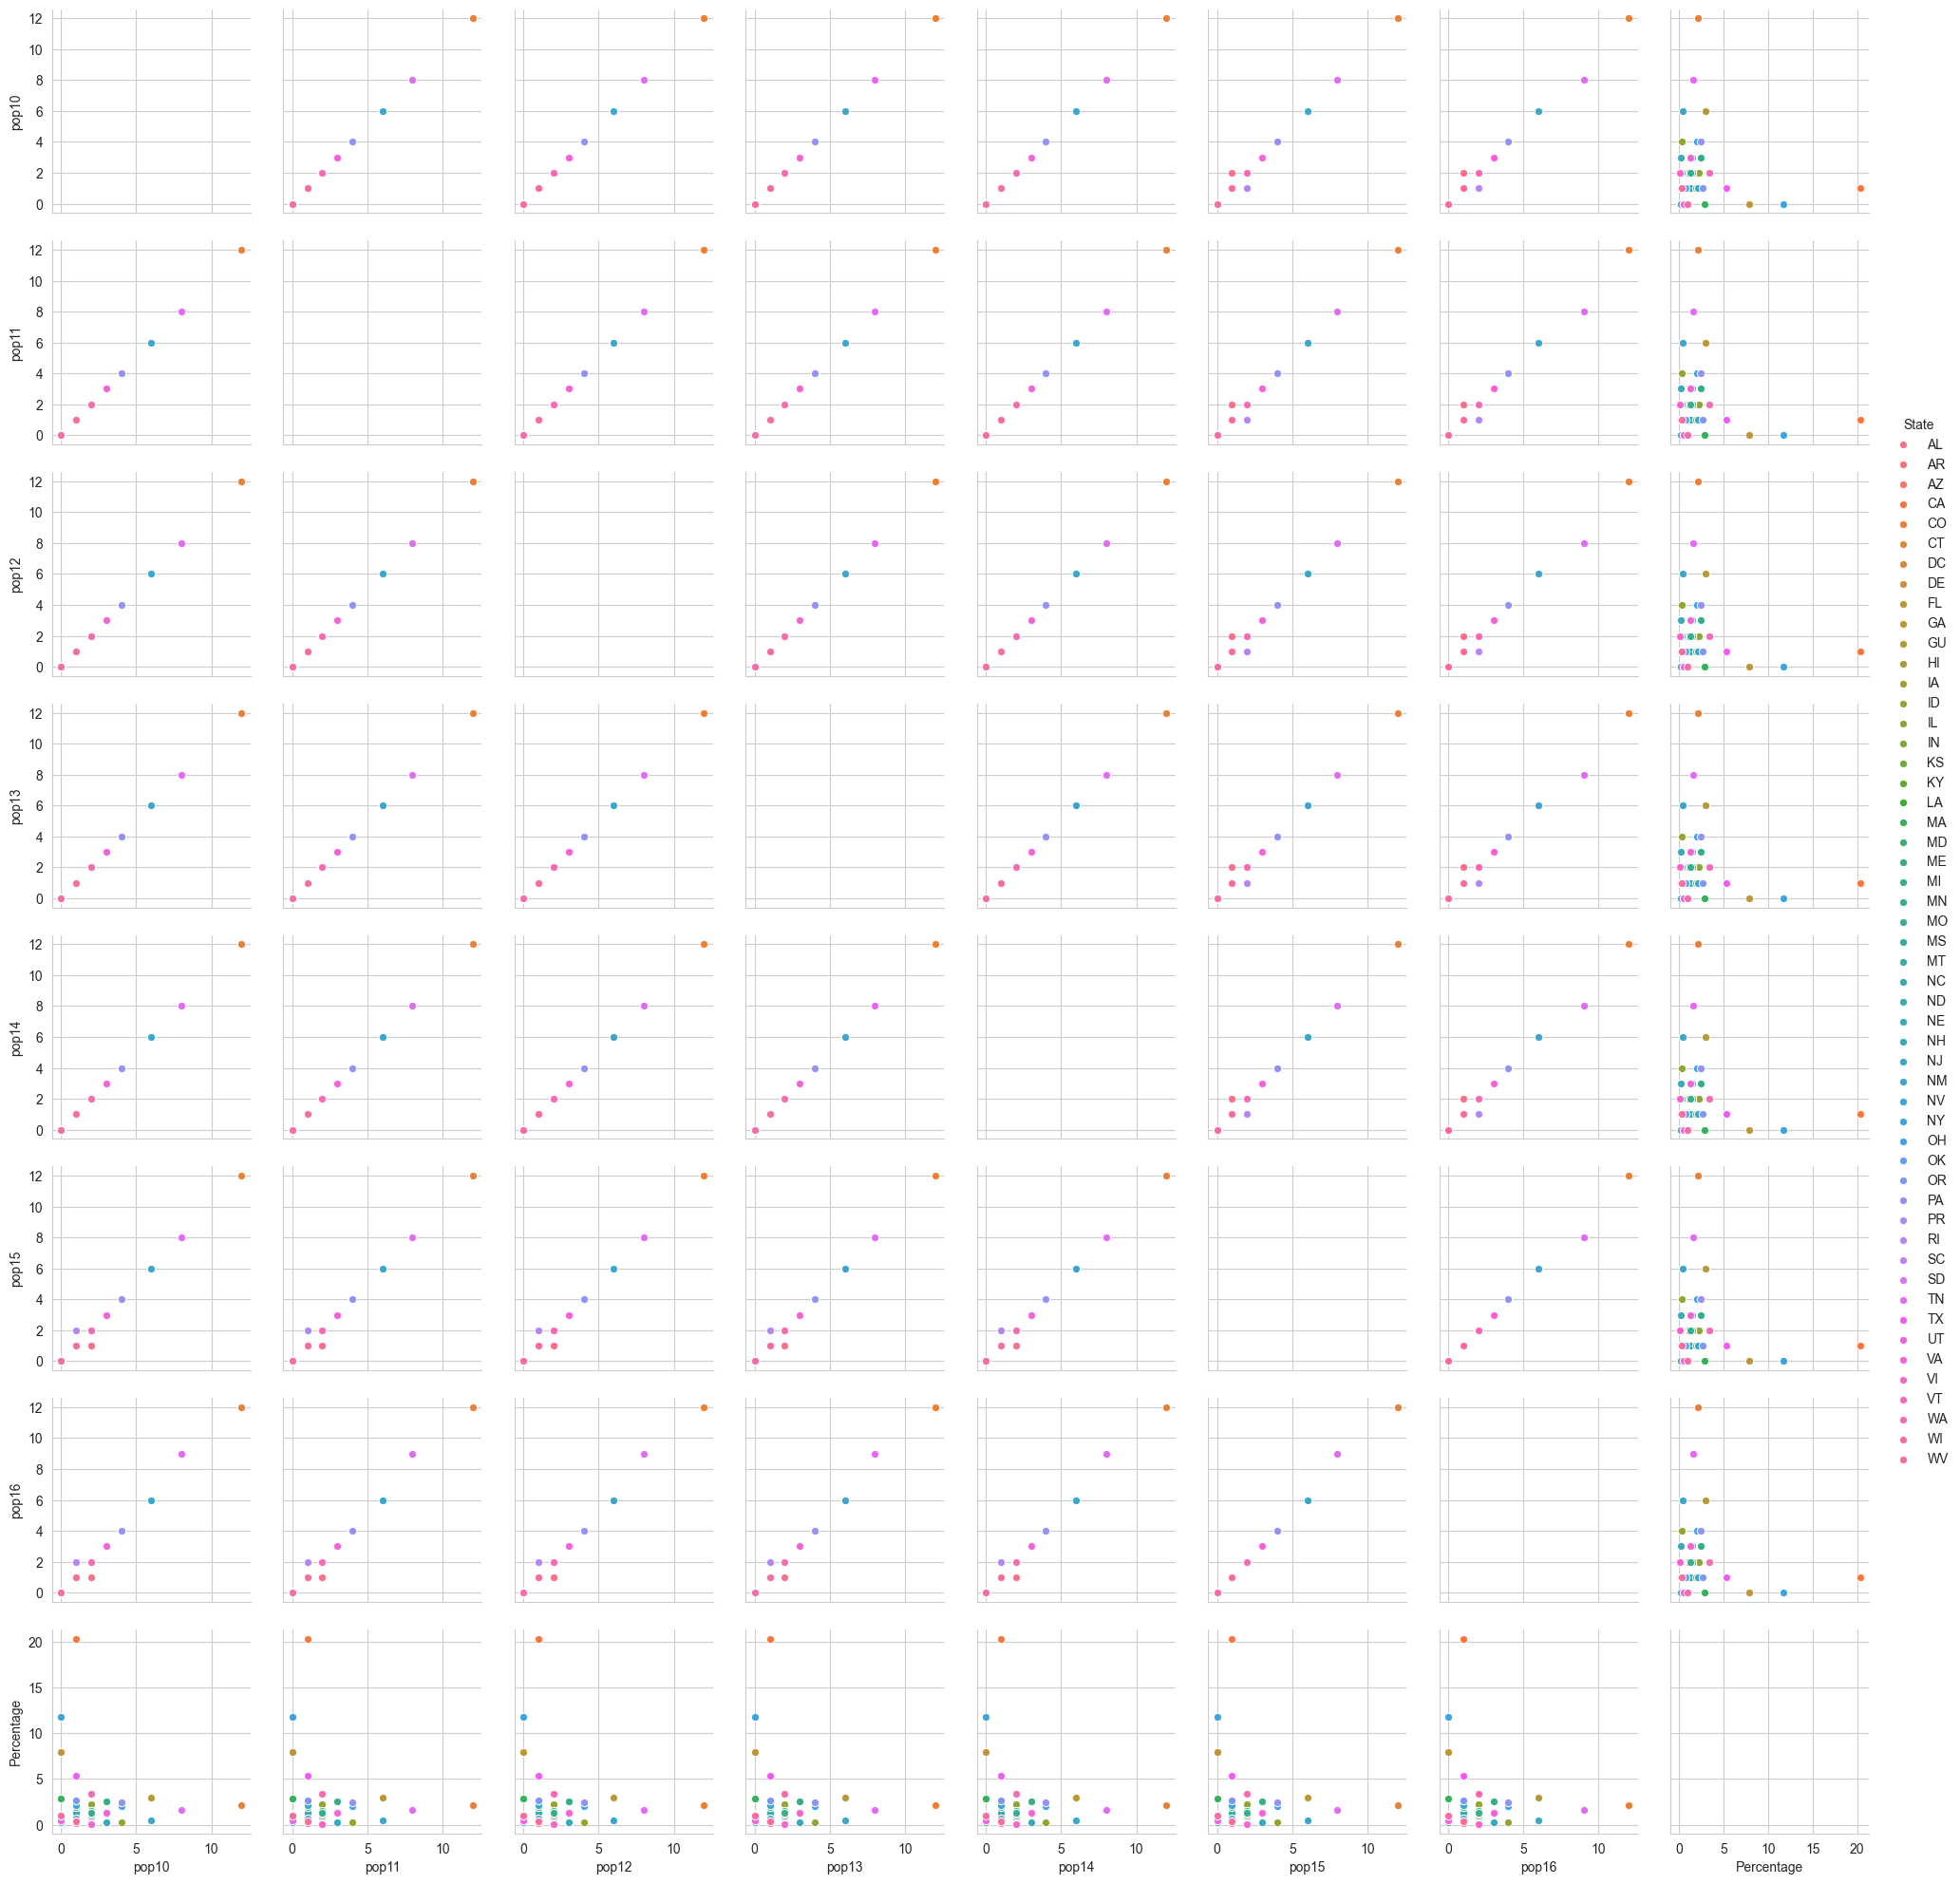

In [1173]:
sns.set_style('whitegrid')
sns.pairplot(pop_by_state_sum_percentage_measure, hue = 'State')
plt.show()


In [1192]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [1194]:

# import pandas as pd
# import chart_studio.plotly as py
# import plotly.offline as po
# import plotly.graph_objs as pg
# import matplotlib.pyplot as plt
# %matplotlib inline
# po.init_notebook_mode(connected = True)

In [1197]:
# data = dict(type = ‘choropleth’, locations = [‘AL’, ‘AK’, ‘AR’, ‘CA’], locationmode = ‘USA-states’, z = [1,2,30,40,50], text = [‘Alabama’, ‘Alaska’, ‘Arizona’, ‘California’])


SyntaxError: invalid character in identifier (<ipython-input-1197-57afed7faa75>, line 1)

In [1259]:
# import pandas as pd
# import plotly.express as px


# fig = px.scatter(df_measures, x = 'Count',  title='Group by Issues')
# fig.show()

In [369]:
#!pip install plotly-express

In [1260]:
# df1.head()

In [559]:
# import pandas as pd 

# df3=df1[(df1['Measures']=='Children of Parenting Youth')] 
# #df3.rename({'median_sale_price':'Median Sales Price ($)'},axis=1, inplace=True)


In [1261]:
# homeless_pop.head()

In [938]:

# #State_Info = homeless_pop.groupby(['State','Measures'], group_keys=False).apply(lambda x: x).mean()
# hgy = homeless_pop.groupby(['Measures','State'])['Year'].aggregate('count')#.plot(rot=45)
# #plt.show()

In [942]:
# #State_Info = homeless_pop.groupby(['State','Measures'], group_keys=False).apply(lambda x: x).mean()
# SML = homeless_pop.groupby(['State','Measures'])['Year'].aggregate('count')#.plot(rot=45)
# #plt.show()

In [1262]:
# SML.nlargest(25)

In [1266]:
# type(hgy.nlargest(25))

In [1265]:
# c.columns

In [1263]:
# #hgy.to_frame()
# type(hgy)

In [955]:
# data1 = pd.DataFrame([SML])

In [1264]:
# homeless_pop.info()

In [298]:

# #import geoplot as gplt
# import geopandas as gpd
# #import geoplot.crs as gcrs
# import imageio
# import pandas as pd
# import pathlib
# import matplotlib.pyplot as plt
# #import mapclassify as mc
# import numpy as np
# import geopandas
# #import geoplot
# import matplotlib.pyplot as plt
# import geopandas

In [299]:
# def stateplotter(states,us map True):
    
  # fig, ax = plt.subplots(figsize=(30,30))
   
#     if 'HI' in states:
#         usa[0:50].plot (ax ax, alpha = 0.3)
#     elif
#         AK' in states:
#         usa(1:51).plot(ax-ax, alpha = 0.3)
#     elif 'AK'and 'HI' in states:
#         usa[0:51).plot (ax ax, alpha = 0.3)
#     else:
#         usa[1:50).plot(ax-ax, alpha = 0.3)
    
#     for n in states:
#         usa(usa.STATE ABBR == f'(n)'].plot(ax-ax, edgecolor='y', linewidth =2)
#     #If you choose not to have the first layer of the whole US, this will plot states on thier own
#     elif us map == False:
#     for nin states:
#         usa[usa.STATE ABBR == f'(n)'].plot(ax-ax, edgecolor='y', linewidth =2)

In [297]:
# ax = gplt.polyplot(
#   contiguous_usa,
#   edgecolor="white",
#   facecolor="lightgray",
#   figsize=(12, 8),
#   projection=gcrs.AlbersEqualArea()
# )

# gplt.pointplot(
#   continental_usa_cities,
#   ax=ax,
#   hue="ELEV_IN_FT",
#   cmap="Blues",
#   scheme="quantiles",
#   scale="ELEV_IN_FT",
#   limits=(1, 10),
#   legend=True,
#   legend_var="scale",
#   legend_kwargs={"frameon": False},
#   legend_values=[-110, 1750, 3600, 5500, 7400],
#   legend_labels=["-110 feet", "1750 feet", "3600 feet", "5500 feet", "7400 feet"]
# )

# ax.set_title("Cities in the continental US, by elevation", fontsize=16)

In [1200]:
# import geopandas
# import pandas
# import matplotlib.pyplot as plt
# import contextily as ctx

In [1201]:
# GEOJSON_FILE = "USStates.geojson"
# #CSV_FILE = "usa-covid-20210102.csv"

# # 3857 - Mercator Projection
# XBOUNDS = (-1.42e7, -0.72e7)
# YBOUNDS = (0.26e7, 0.66e7)

In [1205]:
# geojson = geopandas.GeoDataFrame(pop_by_state_sum_percentage_measure)

In [1220]:
#  ax = mapped_dataset.plot(figsize=(12,6),column=column, alpha=0.75, legend=True, cmap="YlGnBu", edgecolor="k"

SyntaxError: unexpected EOF while parsing (<ipython-input-1220-12dda05a384e>, line 1)

In [1247]:
# def choropleth_map(mapped_dataset, column, plot_type):
#     ax = mapped_dataset.plot(figsize=(12,6),column=column, alpha=0.75, legend=True, cmap="YlGnBu", edgecolor="k")
#     ax.set_xticks([])
#     ax.set_yticks([])
#     title = "COVID-19: {} in the United States\n2 January, 2021".format(title)
#     ax.set_title(plot_type)
#     ax.set_xlim(*XBOUNDS)
#     ax.set_ylim(*YBOUNDS)
#     ctx.add_basemap(ax, crs=full_dataset.crs.to_string(), source=ctx.provicers.Stamen.TonerLite, zoom=4)
#     output_path = "covid19_{}_usa.png"
#     plt.savefig(output_path)                   

    

In [1253]:
# columns_to_plot = [
#     "Percentages" 
    
# ]

# plot_types = [
#     "Percentages_State_Homeless"
    
# ]

# for columns, plot_type in zip(geojson,column, plot_types):
#     choropleth_map(geojson, columns, plot_type)
#     print("Successfully Generated Choropleth Map for {}...".format(plot_type))

NameError: name 'column' is not defined

In [1199]:
#!pip install contextily 

  Using cached contextily-1.3.0-py3-none-any.whl (16 kB)
  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 1.7 MB/s eta 0:00:00
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
  Using cached affine-2.4.0-py3-none-any.whl (15 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
